### 10098
# TMA4215 Numerical Mathematics - Project 1

Not all linear systems are well defined. Some have no solutions, while others have infinitely many. However, it is possible to give these equations unique solutions if we introduce additional criteria. For example for a system with infinitely many solution we can look at the solution with minimal norm, i.e. our problem $A\boldsymbol{x}=\boldsymbol{y}$ gets a unique solution if we say we want the $\boldsymbol{x}$ that fulfills
$$\boldsymbol{x}_{min} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg \min} \| \boldsymbol{x} \|^2$$
Also, for systems that have no solution for can choose the "solution" that is closest. For a problem $A\boldsymbol{x}=\boldsymbol{y}$ we can add the demand $$
\boldsymbol{x} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg \min} \| A\boldsymbol{x} - \boldsymbol{y} \|_2^2
$$

This does not necessarily create a unique solution, however if we apply our first method on this new problem, we suddenly have a unique solution. 

In this project we will look into multiple ways to decompose coefficient matrices, and how these decompositions can be used  to more easily solve these optimization problems. We will look at advantages and disadvantages of the different methods, especially focusing on efficiency. Lastly, in the third part of the project, we will apply some of these discussions to a real life problem; single channel source separation.

## Task 1: Theoretical background and QR-decomposition

### a) Solutions to linear systems

As mentioned in the introduction, not all linear problems have solutions. The equation $A\boldsymbol{x}=\boldsymbol{y}$ does not have a solution if $\boldsymbol{y} \notin Col  A$, so there are infinitely many examples of concrete problems with no solution. The equation

$$
\begin{bmatrix}
1&2&3 \\ 1&2&3
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 0
\end{bmatrix}
$$

has no solution.

In the case of infinitely many solutions, we also have infinitely many examples. For $A\in M_{m \times n}$ and $m<n$ (i.e. $A$ is wide), if there exists a solution, there are infinitely many. This because there is no way to set the columns of $A$ so that they are all linearly independent. For example
$$
\begin{bmatrix}
1&0&1 \\ 0&1&1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
=
\begin{bmatrix}
2 \\ 3
\end{bmatrix}
$$

has infinitely many solutions.

NB: For the rest of this project, when referring to $A$, we assume that $A\in M_{m\times n}$ where $m<n$, unless otherwise is clearly stated.

### b) Symmetric positive definite and invertibility

When deriving solutions to these optimization problems, special matrices with practical and important properties often appear. For example symmetric matrices (i.e. $A = A^T$) and positive (semi-)definite matrices have special properties. Matrices multiplied by their transpose often appear, and for a matrix $A$, $AA^T$ and $A^TA$ are symmetric. To prove that $AA^T$ and $A^TA$ are symmetric, we look at the transpose of the matrix, and utilize that $(AB)^T=B^TA^T$.

$$
(AA^T)^T = (A^T)^TA^T = AA^T \hspace{1cm} \square
$$

$$
(A^TA)^T = A^T(A^T)^T = A^TA \hspace{1cm} \square
$$

These matrices are actually also positive semi-definite. To prove this we look at the definition: $A$ is positive semi-definite $\iff \boldsymbol{x}^T A \boldsymbol{x} \geq 0$. Also, we know that $\boldsymbol{x}^T A = A^T \boldsymbol{x}$. Using this, we see

$$
\boldsymbol{x}^T A^T A \boldsymbol{x} 
= (A^T)^T (\boldsymbol{x}^T)^T A \boldsymbol{x} 
= A\boldsymbol{x}A\boldsymbol{x} = (A\boldsymbol{x})^2) \geq 0 \hspace{1cm} \square \\
\boldsymbol{x}^T A A^T \boldsymbol{x} 
= A^T (\boldsymbol{x}^T)^T A^T \boldsymbol{x} 
= A^T\boldsymbol{x}A^T\boldsymbol{x} = (A^T\boldsymbol{x})^2) \geq 0 \hspace{1cm} \square
$$

The reason we are so interested in establishing that these matrices are symmetric positive semi-definite is that this implies $A^TA$ is invertible, assuming $A$ has full rank. To prove this, let us look at $A$. We assume that $A$ has full rank, i.e. $\text{dim}(\text{Col}A) = m$. We also know that an $k \times k$ matrix $B$ is invertible iff $\text{rank}(B) = k$. $A^TA$ will be an $n\times n$ matrix and $AA^T$ an $m \times m$ matrix. If we can show that $\text{rank}(A) = \text{rank}(A^TA) = \text{rank}(AA^T)$ then $A^TA$ will be invertible and $AA^T$ will not be.

We start by looking at the nullspaces of $A$ and $A^TA$

$$
A\boldsymbol{x} = \boldsymbol{0}
\implies A^TA\boldsymbol{x} = \boldsymbol{0}
\implies \text{Null}(A) \subseteq \text{Null}(A^TA)
$$

Similarly we see that

$$
A^TA\boldsymbol{x} = \boldsymbol{0}
\implies \boldsymbol{x}^TA^TA\boldsymbol{x} = \boldsymbol{0}
\implies A\boldsymbol{x}A\boldsymbol{x} = \boldsymbol{0}
\implies A\boldsymbol{x} = \boldsymbol{0}
\implies \text{Null}(A^TA) \subseteq \text{Null}(A)
$$

So we end up with

$$
\text{Null}(A^TA) = \text{Null}(A) \label{eq1}\tag{1}
$$

Because assume that, when $A\in M_{m\times n}$ where $m<n$

$$
\text{dim}(\text{Null}(A)) + \text{rank}(A) = n
$$

and

$$
\text{dim}(\text{Null}(A^TA)) + \text{rank}(A^TA) = n
$$

Inserting $(\ref{eq1})$ we find 

$$
\text{rank}(A) = \text{rank}(A^TA) \label{eq2}\tag{2}
$$

Substituting $A$ for $A^T$ and $A^T$ for $A$ we get

$$
\text{rank}(A^T) = \text{rank}(AA^T) \label{eq3}\tag{3}
$$

We know $\text{rank}(A) = \text{rank}(A^T)$, so $(\ref{eq2})$ and $(\ref{eq3})$ yield

$$
\text{rank}(A) = \text{rank}(A^TA) = \text{rank}(AA^T)
$$

This was what we were looking for, hence $A^TA$ is invertible and $AA^T$ is not.

### c) Lagrange function

For the optimization problem

$$
\boldsymbol{x}_{min} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg\min} \| \boldsymbol{x} \| , \text{  such that  } A\boldsymbol{x} = \boldsymbol{y}
$$

we can use the Lagrange function to find a solution to the problem, i.e. minimize the norm while staying inside the constraint ($A\boldsymbol{x} = \boldsymbol{b}$). In our case the Lagrange function takes the form

$$
\mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) 
= \boldsymbol{x}^T\boldsymbol{x} + \boldsymbol{\lambda}^T(A\boldsymbol{x} - \boldsymbol{y}) \label{eq4}\tag{4}
$$

We know that a solution to the $(\ref{eq4})$ satisfies $\nabla_\boldsymbol{x} \mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) = 0$ and $\nabla_\boldsymbol{\lambda} \mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) = 0$

We now calculate the gradients, assuming these following are known (exercise 2)

$$
\nabla \left( \|\boldsymbol{x}\|_2^2 \right)= 2\boldsymbol{x}\\
\nabla \left( A\boldsymbol{x} \right) = A
$$

We find that

$$
\nabla_\boldsymbol{x} \mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) 
= 2\boldsymbol{x} + A^T \boldsymbol{\lambda} \label{eq5}\tag{5} 
$$

$$
\nabla_\boldsymbol{\lambda} \mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) 
= A \boldsymbol{x} - \boldsymbol{y} \label{eq6}\tag{6}
$$

If we set $(\ref{eq4})$ to $0$ and solve for $\boldsymbol{x}$ we get 

$$
\boldsymbol{x} = -\frac{1}{2}A^T\boldsymbol{\lambda} \label{eq7}\tag{7}
$$

Setting $(\ref{eq6})$ to $0$, and inserting $(\ref{eq7})$ for $\boldsymbol{x}$ we get

$$
\boldsymbol{\lambda} = -2(AA^T)^{-1}\boldsymbol{y}
$$

Inserting this for $\boldsymbol{\lambda}$ in $(\ref{eq7})$

$$
\boldsymbol{x}_{min} = A^T(AA^T)^{-1}\boldsymbol{y} \label{eq8}\tag{8}
$$

### d) QR and Gram-Schmidt

As described in the introduction, there are multiple ways to decompose $A$ that will make life easier when solving the optimization problem. We now want to write ([8](#mjx-eqn-eq8)) using a $QR$-decomposition. In this case a $QR$-decomposition means writing $A^T=QR$ where $Q$ is an orthogonal matrix and $R$ is upper triangular. To study ([8](#mjx-eqn-eq8)) we also remember the properties $(AB)^{-1} = B^{-1}A^{-1}$, $(AB)^{T} = B^{T}A^{T}$ and $Q^TQ = I$. Where the last equality only holds for orthogonal matrices. Now we can rewrite ([8](#mjx-eqn-eq8))

$$
\begin{aligned}
\boldsymbol{x}_{min} &= A^T(AA^T)^{-1}\boldsymbol{y} \\
&= QR((QR)^TQR)^{-1} \boldsymbol{y} \\
&= QR(R^TQ^TQR)^{-1} \boldsymbol{y} \\
&= QR(R^TR)^{-1} \boldsymbol{y} \\
&= QRR^{-1}R^{-T} \boldsymbol{y} \\
&= QR^{-T} \boldsymbol{y}
\end{aligned}
$$

hence

$$
\boldsymbol{x}_{min} = QR^{-T} \boldsymbol{y} \label{eq9}\tag{9}
$$

Here $R^{-T}$ denotes the inverse transpose.

We now introduce some code to compute a $QR$-decomposition. A simple yet genius way of calculating the orthogonal matrix $Q$ is using the [Gram–Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). The first function `gram_schmidt()` orthonormalizes a given matrix. The second function `QR()` utilizes `gram_schmidt()` to find the orthogonal matrix $Q$ and the upper triangular matrix $R$ so that $A^T = QR$.

In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def gramSchmidt(x):
    """
    Orthonormalizes a given matrix. Output matrix has orthonormal rows.
    
    input: x (mxn)
    return: q (mxn)
    """
    m = len(x)
    n = len(x[0])
    v = np.copy(x)
    q = np.zeros((m, n))
    for i in range(m):
        q[i] = v[i]/np.linalg.norm(v[i]) 
        for j in range(i, m):
            v[j] -= (np.transpose(q[i])@v[j])*q[i]
    return q

def QR(A):
    """
    Computes a QR-decomposition of A so that A = QR where
    Q is an orthogonal matrix and R is upper triangular.
    
    input: A (mxn)
    return: Q (mxn), R (nxn)
    """
    At = A.T
    Qt = gramSchmidt(At)
    Q = Qt.T
    m = len(A)
    n = len(A[0])
    R = np.zeros((n,n))
    for i in range(n):
        for j in range(i, n):
            R[i][j] = At[j] @ Qt[i]
    return Q, R

In [6]:
# Testing code form previous cell
A = np.array([[1,3,4], [1,1,5]], dtype="float64")
Q, R = QR(A.T)
print("A^T\n", A.T)
print("\nQ\n", Q)
print("\nR\n", R)
print("\nQR\n", Q@R)

A^T
 [[1. 1.]
 [3. 1.]
 [4. 5.]]

Q
 [[ 0.19611614  0.03494283]
 [ 0.58834841 -0.80368504]
 [ 0.78446454  0.59402807]]

R
 [[5.09901951 4.70678724]
 [0.         2.20139816]]

QR
 [[1. 1.]
 [3. 1.]
 [4. 5.]]


### e) Avoiding inverses and implementing solver

Because inverses are generally difficult and time-consuming to compute, we would really like to solve ([9](#mjx-eqn-eq9)) without calculating the inverse $R^{-T}$. Luckily, by using a few tricks to rewrite the equation we can avoid this.

$$
\begin{align*}
\boldsymbol{x}_{min} &= QR^{-T} \boldsymbol{y} \\
Q^T\boldsymbol{x}_{min} &= R^{-T} \boldsymbol{y} \\
R^T Q^T\boldsymbol{x}_{min} &= \boldsymbol{y} \label{eq10}\tag{10}
\end{align*}
$$

Setting 

$$
\begin{align*}
Q^T\boldsymbol{x}_{min} &= \boldsymbol{c}\\
\boldsymbol{x}_{min} &= Q\boldsymbol{c} \label{eq11}\tag{11}
\end{align*}
$$ 

$(\ref{eq10})$ takes the form

$$
R^T \boldsymbol{c} = \boldsymbol{y} \label{eq12}\tag{12}
$$

which we can easily solve for $\boldsymbol{c}$, since $R^T$ is a lower triangular matrix which means we can go straight to forward substitution. Using the solution for $\boldsymbol{c}$ we can find $\boldsymbol{x}_{min}$ from $(\ref{eq11})$ without calculating $R^{-T}$.


We now want to implement some code that utilizes our preceding discussion. We already have the function `QR()` that computes a $QR$-decomposition. All we need now is a function that puts this together with $(\ref{eq11})$ and $(\ref{eq12})$, and also solver for  $(\ref{eq12})$. We use `scipy.linalg.solve_triangular()` to solve $(\ref{eq11})$ and $(\ref{eq12})$. The subsequent function `solve_xmin()` puts all this together for a given system $A\boldsymbol{x}=\boldsymbol{y}$.

In [7]:
def solve_xmin(A, y):
    """
    Solves Ax = b for x with minimal norm.
    
    input: A (mxn), y (nx1)
    return: x (mx1)
    """
    Q, R = QR(A)
    c = la.solve_triangular(R.T, y, lower = True)
    x = Q @ c
    return x

Lets go back to the problem from Task $1a)$ with infinitely many solutions. In the cell below we test our new function on this problem.

In [8]:
# Testing new code from previous cell
A = np.array([[1,0,2], [0,1,3]], dtype="float64")
x = solve_xmin(np.array([[1,0,2], [0,1,3]], dtype="float64").T, np.array([1, 1]))
print("A =\n", A)
print("\ny =", np.array([1, 1]))
print("------\nx =", x)
print("\nAx =", A @ x, "\n\n||x|| =", np.linalg.norm(x))

A =
 [[1. 0. 2.]
 [0. 1. 3.]]

y = [1 1]
------
x = [ 0.28571429 -0.07142857  0.35714286]

Ax = [1. 1.] 

||x|| = 0.4629100498862757


Indeed we have found a unique solution to our problem! And luckily, after all our calculations, the solution adds up and $A\boldsymbol{x} = \begin{bmatrix}1&1\end{bmatrix}=\boldsymbol{y}$.

### f) NumPy knokout?

After testing our implementation on a small example, its time to scale things up. Also, we would like to see how we can do vs. NumPy's solver. NumPy may have experts that have been working for years to optimize their algorithms, however our solution by $QR$-decomposition looks very elegant. Also if we use the same coefficient matrix for many problems we only have to do one $QR$-decomposition while NumPy's solver will run on the non-decomposed matrix many times. So, how well do w do to NumPy's `np.linalg.solve()`?. We use the handed out code to generate:
- $A$, a $m\times n$-matrix
- $X$, a $n\times N$-matrix. Where every column of $X_i$ is a $\boldsymbol{x}$-vector for $i=1,\ldots,N$
- $Y$ (matrix product of A and X), a $m\times N$-matrix. Where every column of $Y_i$ is a $\boldsymbol{y}$-vector for $i=1,\ldots,N$

In other words, we generate $N$ $\boldsymbol{y}$'s so that we have $N$ different problems. However, since we only have to do a $QR$-decomposition once we also implement a function `solve_xmin_QR()`. This function solves ([9](#mjx-eqn-eq9)) given a $QR$-decomposition. The function `testOwnImplementation()` computes the $QR$-decomposition and then calls `solve_xmin_QR()` for the $N$ different problems. `testNumPy()` computes $AA^T$ once, then uses `np.linalg.solve()` $N$ times.

In [13]:
def generate_A(m,n): # Handed out function
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """
    cov_eigvecs = np.random.uniform(-1.0,1.0,(m,m))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = la.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(chol, A)
    return A

def solve_xmin_QR(Q, R, y):
    """
    Solves Ax = b for x with minimal norm, given QR decomposition
    
    input: Q (mxn), R (nxn), y (nx1)
    return: x (mx1)
    """
    c = la.solve_triangular(R.T, y, lower = True)
    x = Q @ c
    return x

def testOwnImplementation(A, X, Y, N, onlyQR = False, plot = False):
    Q, R = QR(A.T)
    if onlyQR:
        return
    
    if plot:
        norms = np.zeros(N)
        sol = np.zeros(N)
        for i in range(N):
            x_own = solve_xmin_QR(Q, R, Y[:,i])
            norms[i] = np.linalg.norm(x_own - X[:,i])
            sol[i] = np.linalg.norm(A@x_own - Y[:,i])
        return norms, sol
    
    for i in range(N):
        x_own = solve_xmin_QR(Q, R, Y[:,i])
    print("Our method: ||x_min - x_true|| =", np.linalg.norm(x_own - X[:,i]))
    print("Our method: ||Ax_min - y|| =", np.linalg.norm(A@x_own - Y[:,i]))
            
def testNumPy(A, X, Y, N, onlyPreCalc = False ,x_min = False, plot = False):
    A_T = A.T
    AA_T = A@A_T
    if onlyPreCalc:
        return
    
    if plot:
        norms = np.zeros(N)
        sol = np.zeros(N)
        for i in range(N):
            z_np = np.linalg.solve(AA_T, Y[:,i])
            x_np = A_T@z_np
            norms[i] = np.linalg.norm(x_np - X[:,i])
            sol[i] = np.linalg.norm(A@x_np - Y[:,i])
        return norms, sol
    
    if x_min:
        for i in range(N):
            z_np = np.linalg.solve(AA_T, Y)
            x_np = A_T@z_np 
        return np.linalg.norm(x_np - X)
    else:
        for i in range(N):
            z_np = np.linalg.solve(AA_T, Y[:,i])
            x_np = A_T@z_np 
        print("NumPy: ||x_min - x_true|| =", np.linalg.norm(x_np - X[:,i]))
        print("NumPy: ||Ax_min - y|| =", np.linalg.norm(A@x_np - Y[:,i]))

We generate $A$, $X$ and $Y$ using the handed out code as described.

In [19]:
# This code was handed out
N = 100
m = 2048
n = 8096
A = generate_A(m, n)
X = np.random.normal(0.0,1.0,(A.shape[1],N))
Y = np.dot(A,X)

Firstly, lets test how long the $QR$-decomposition takes for our implementation

In [7]:
%%timeit -r 1 -n 1
testOwnImplementation(A, X, Y, N, onlyQR = True)

51.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Then, lets look at NumPy's precalculations

In [8]:
%%timeit
testNumPy(A, X, Y, N, onlyPreCalc = True)

453 ms ± 42.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The results are not surprising. Our method has to make $2048$ vectors of length $8096$ orthogonal to each other in its precalculations. NumPy's precalculations only consists of multiplying to matrices together which is far less time consuming. The interesting part will now be to look at the time the two methods use to solve the problem after the precalcualtions. Our method is done with the heavy lifting, all thats left is forward substitution and then multiplying with a vector to get the result. Let us have a look at what time it takes.

In [9]:
%%timeit -r 1 -n 1
testOwnImplementation(A, X, Y, N)

Our method: ||x_min - x_true|| = 78.07059637805925
Our method: ||Ax_min - y|| = 2.112009957248984e-10
53.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now let us time the NumPy solver

In [10]:
%%timeit -r 1 -n 1
testNumPy(A, X, Y, N)

NumPy: ||x_min - x_true|| = 78.07059637805928
NumPy: ||Ax_min - y|| = 3.3142904559174474e-10
15.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Our method actually only uses approximately $1.8$ seconds to do the remaining computations. So, in this case it uses $96.6$% of the time at the precalculations. On the contrary, NumPy's solver uses about $94.3$% of its time doing the "solving". This way, these methods are like black and white. Now, if we were to solve for many more problems, with the same coefficient matrix our method would be actually be faster. Assuming a linear rate, and using the numbers find when timing our method would actually "catch up" at $N = 389$. Already at $N = 905$, our method would only use half the time of NumPy's solver. Also, with some optimizing, the total time of our implementation would probably be possible to reduce a fair bit.

From the prints above, it looks like both methods find the same solution, and have decreased the norm (compared to $\boldsymbol{x}_{true}$). Also, it looks like our results are actual solutions, with some error (order of magnitude $10^{-10}$). Since the prints are only for one of the $100$ problems, let us get a more broad insight by producing a some plots.

In [20]:
norms_own, sol_own = testOwnImplementation(A, X, Y, N, plot=True)
norms_np, sol_np = testNumPy(A, X, Y, N, plot=True)
xs = np.arange(N)

norms_true = np.zeros(N)
i = 0
for x in X.T:
    norms_true[i] = np.linalg.norm(x)
    i += 1

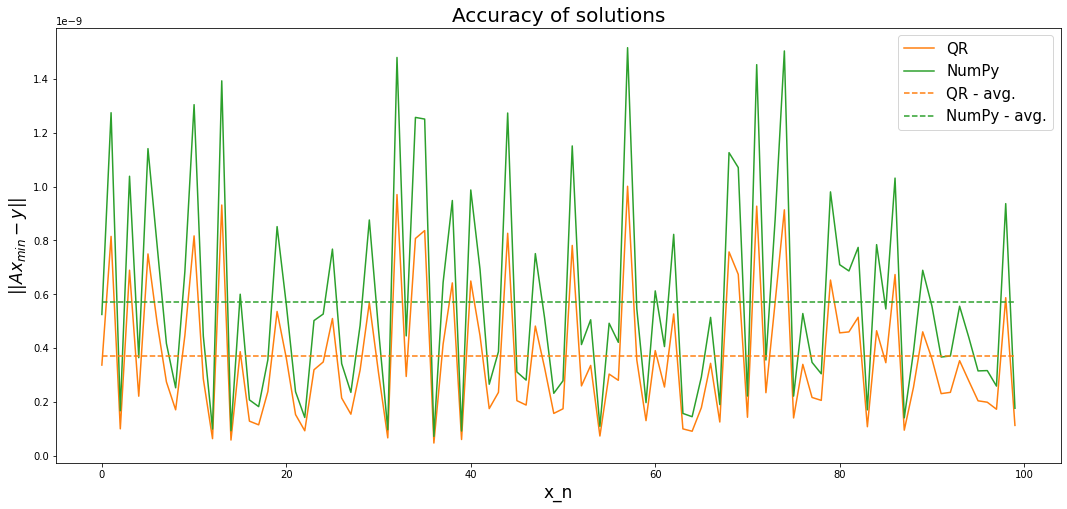

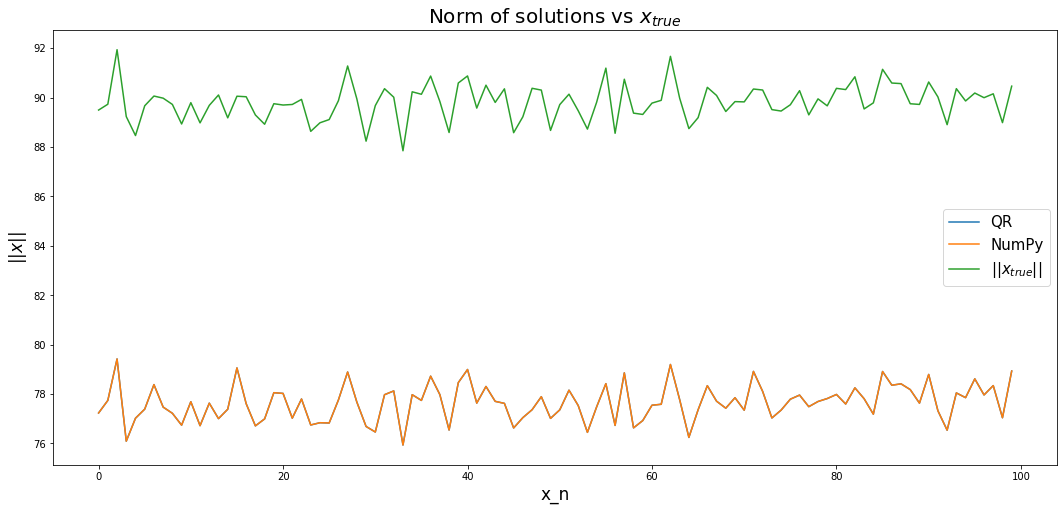

In [34]:
# Accuracy plot:
plt.figure(figsize=(18,8))
plt.plot(xs, sol_own, "C1")
plt.plot(xs, sol_np, "C2")
plt.plot(xs, np.full(N, sum(sol_own)/N), "C1--")
plt.plot(xs, np.full(N, sum(sol_np)/N), "C2--")

plt.title("Accuracy of solutions", fontsize = 20)
plt.xlabel("x_n", fontsize = 17)
plt.ylabel("$\||Ax_{min} - y||$", fontsize = 17)
plt.legend(["QR", "NumPy", "QR - avg.", "NumPy - avg."], fontsize = 15)


# Norms plot:
plt.figure(figsize=(18,8))
plt.plot(xs, norms_own)
plt.plot(xs, norms_np)
plt.plot(xs, norms_true)

plt.title("Norm of solutions vs $x_{true}$", fontsize = 20)
plt.xlabel("x_n", fontsize = 17)
plt.ylabel("$\||x||$", fontsize = 17)
plt.legend(["QR", "NumPy", "$||x_{true}||$"], fontsize = 15)

In the first lot, we see the accuracy of the plots, and they confirm our previous discussions. The average of both our and NumPy's solver is very good, and the error is of order $10^{-10}$. Looking at the norms, firstly, the reason there is no blue is because the $QR$ and NumPy lines overlap perfectly. So they clearly find the same solution. Additionally, these norms are clearly lower than $\| \boldsymbol{x}_{true} \|$. So, to conclude, our solutions are meaningful. We have quantitatively tested that $A\boldsymbol{x}_{min} = \boldsymbol{y}$, also we have clearly decreased the norm of our solution substantially (compared to the original, $\boldsymbol{x}_{true}$. Since the norm of the solution from both NumPy's solver and ours are equal, it is fair to conclude that this is indeed the unique solution.

## Task 2: SVD and Tikhonov regularisation

As mentioned in the introduction, minimizing the norm of our solution $\boldsymbol{x}$, is not the only way to go about a linear problem. We also briefly touched on the subject of least squares, i.e.

$$
\boldsymbol{x}_{ls} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg \min} \| A\boldsymbol{x} - \boldsymbol{y} \|_2^2
$$

As mentioned, this does not necessarily give us a unique solution. However, we can also consider a balance between the least squares and the norm discussed earlier by introducing a $\mu$ such that

$$T(\boldsymbol{x}) = \| A\boldsymbol{x} - \boldsymbol{y} \|_2^2 + \mu \| \boldsymbol{x} \|_2^2\label{eq13}\tag{13}$$

We will now turn our attention to the minimizer of $T(\boldsymbol{x})$,

$$
\boldsymbol{x}_{r} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg \min  } \left( T(\boldsymbol{x}) \right) \label{eq14}\tag{14}
$$

this is known as Tikhonov regularization. Here, we will also look at another way of decomposing the coefficient matrix that will be helpful in computations.

### a) Solution to Tikhonov regularisation

Firstly, let us have a look at how to solve our problem using Tikhonov regularization. It has been given that a solution to the Tikhonov regularization satisfies $\nabla_xT(\boldsymbol{x}) = 0$. $\nabla_xT({\boldsymbol{x}})$ is commonly known and was calculated in exercise $2$, so the computations will not be included here.

$$
\nabla_xT({\boldsymbol{x}}) = 2A^T(A\boldsymbol{x} - \boldsymbol{y}) + 2\mu\boldsymbol{x} \label{eq15}\tag{15}
$$

Setting ($\ref{eq15}$) to zero we get

$$
\begin{align*}
A^T(A\boldsymbol{x} - \boldsymbol{y}) + \mu\boldsymbol{x} &= 0 \\
A^TA\boldsymbol{x} + \mu\boldsymbol{x} &= A^T\boldsymbol{y} \\
(A^TA + \mu I) \boldsymbol{x} &= A^T\boldsymbol{y} \label{eq16}\tag{16}
\end{align*}
$$

Now, as for task $1$ we are interested in the invertibility of the coefficient matrix. We can quite simply see how the matrix $A^TA\boldsymbol{x} + \mu I$ is symmetric positive definite and hence invertible. Firstly, a matrix times its transpose is always symmetric, so $A^TA$ is symmetric. Also, the sum of symmetric matrices is symmetric, and $\mu I$ is clearly symmetric, so $A^TA\boldsymbol{x} + \mu I$ is symmetric. We remember the definition of positive definite:

$$
\begin{align*}
\boldsymbol{x}^T A \boldsymbol{x} > 0, \hspace{0.5cm} \forall \hspace{0.2cm} \boldsymbol{0} \neq \boldsymbol{x} \in \mathbb{R}^n
\end{align*}
$$

Looking at $(\ref{eq16})$ we find

$$
\begin{align*}
(A^TA\boldsymbol{x} + \mu I) \boldsymbol{x} &= A^T\boldsymbol{y} \\
\boldsymbol{x}^T(A^TA\boldsymbol{x} + \mu I) \boldsymbol{x} &= \boldsymbol{x}^TA^T\boldsymbol{y} = (A\boldsymbol{x})^T \boldsymbol{y} = \boldsymbol{y}^T \boldsymbol{y} = \| \boldsymbol{y} \|^2 > 0
\end{align*}
$$

so $A^TA\boldsymbol{x} + \mu I$ is symmetric positive definite and consequently invertible.

### b) Singular Value Decomposition

Another way of decomposing $A$, instead of $QR$, is a [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD). This means writing $A = U\Sigma V^T$. Here, $U$ and $V$ are unitary matrices and $\Sigma$ is a diagonal matrix with non-negative real numbers. Any further discussion of the SVD is not necessary for now, however it is important to remark the properties of the matrices. In our case, where we only work with real numbers, for a unitary matrix $U$ we have that $U^T = U^{-1}$. We assume that most of the properties of diagonal matrices are known. Now, let us use SVD to study our solution $\boldsymbol{x}_r$. Looking at ([16](#mjx-eqn-eq16)) and substituting in the SVD we get

$$
\begin{align*}
((U\Sigma V^T)^T(U\Sigma V^T) + \mu I) \boldsymbol{x}_r &= (U\Sigma V^T)^T\boldsymbol{y} \\
((V \Sigma^T U^T U\Sigma V^T + \mu I) \boldsymbol{x}_r &= V \Sigma U^T \boldsymbol{y} \\
((V \Sigma^T \Sigma V^T + V\mu I V^T) \boldsymbol{x}_r &= V \Sigma U^T\boldsymbol{y} \\
V(\Sigma^T \Sigma + \mu I )V^T \boldsymbol{x}_r &= V \Sigma U^T\boldsymbol{y} \\
\boldsymbol{x}_r &= ((\Sigma^T \Sigma + \mu I )V^T)^{-1} \Sigma U^T\boldsymbol{y} \\
\boldsymbol{x}_r &= V \left[ (\Sigma^T \Sigma + \mu I )^{-1} \Sigma \right ] U^T\boldsymbol{y} \label{eq17}\tag{17}
\end{align*}
$$

So $\boldsymbol{x}_r$ can be written as $\boldsymbol{x}_r = VDU^T\boldsymbol{y}$ where $D = (\Sigma^T \Sigma + \mu I )^{-1}\Sigma$, and obviously diagonal. This means the inverse is very easy to compute.

### c) SVD and Tikhonov implementation

Using the result from our previous discussion, we create a function `tikhonovSolveSVD()` that solves ([14](#mjx-eqn-eq14)), using ([17](#mjx-eqn-eq17)). Here, we also utilize that for a diagonal matrix $D$, we get the inverse just by inverting all elements on the diagonal.

In [40]:
def tikhonovSolveSVD(U, S, Vt, mu, y):
    """"
    Solves equation 13 given SVD: A = U S V^t
    
    input:
        U: Orthagonal matrix U (mxm)
        S: Sigma matrix (mx1)
        Vt: Orthogonal matrix V, transposed (nxn)
        mu: "balance" coefficient (int)
        y: (mx1)
    return:
        x_r (nx1)
    """
    D = S/(S**2 + mu)
    x_r = Vt.T @ np.diag(D) @ U.T @ y
    return x_r

### d) What $\boldsymbol{\mu}$ to use?

Now, just like in task $1$, let us do a numerical experiment. Instead of solving for many different $\boldsymbol{y}$s we this time want to see how solutions differ with different $\mu$s. At the same time, we want to compare our method to NumPy's solver. We implement the function `testSVD()` that for a given coefficient matrix, $\boldsymbol{y}$ and an array of $\mu$s solves ([14](#mjx-eqn-eq14)). It also uses $\boldsymbol{x}_{true}$ (the true solution) to compare the result and return an array of norms $\| \boldsymbol{x}_r - \boldsymbol{x}_{true} \|$ for the different $\mu$s.

In [37]:
def testSVD(A, mus, X, Y, onlyPreCalc = False):
    """"
    Solves optimization problem (13) for different mus using SVD.
    
    input:
        A: (mxn)
        mus: "balance" coefficients (1xN)
        X: (nx1)
        Y: (mx1)
    return:
        norms (1xN)
    """
    U, S, Vt = np.linalg.svd(A,full_matrices = False)
    if onlyPreCalc:
        return
    norms = np.zeros(len(mus))
    
    i = 0
    for mu in mus:
        x = tikhonovSolveSVD(U, S, Vt, mu, Y)
        norms[i] = np.linalg.norm(x - X)
        i += 1
    return norms
        
def testNumPy2(A, mus, X, Y, onlyPreCalc = False):
    """"
    Solves optimization problem (13) for different mus using NumPy.
    
    input:
        A: (mxn)
        mus: "balance" coefficients (1xN)
        X: (nx1)
        Y: (mx1)
    return:
        norms (1xN)
    """
    AtA = A.T @ A
    Aty = A.T @ Y
    if onlyPreCalc:
        return
    n = AtA.shape[0]
    norms = np.zeros(len(mus))
    
    i = 0
    for mu in mus:
        x = np.linalg.solve(AtA + mu*np.identity(n), Aty)
        norms[i] = np.linalg.norm(x - X)
        i += 1
    return norms

We use handed out code to generate $A$ and a solution.

In [38]:
m = 2048
n = 8096
musSVD = np.logspace(5,-6, num = 20)
musNP = np.logspace(5,-6, num = 20)
A = generate_A(m, n)
X = np.random.normal(0.0,1.0,A.shape[1])
Y = np.dot(A,X)

Let us time the precalculations of our implementation.

In [14]:
%%timeit -r 1 -n 1
testSVD(A, musSVD, X, Y, onlyPreCalc = True)

12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now, for NumPy's method.

In [15]:
%%timeit -r 1 -n 1
testNumPy2(A, musNP, X, Y, onlyPreCalc = True)

2.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Not surprisingly, as in task $1$, our precalcualtions are much more time consuming. Just as task $1$ we do a decomposition while all NumPy's method does is multiplying two matrices together. We therefore expect that we get similar results as in task $1$ where the remaining calculations are much faster for our method. Let us time both methods for the full computations and compare.

In [16]:
%%timeit -r 1 -n 1
normsSVD = testSVD(A, musSVD, X, Y)

48.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -r 1 -n 1
normsNP = testNumPy2(A, musNP, X, Y)

2min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The SVD approach is much quicker already when running for $20$ examples. Its remaining computations are a lot more comprehensive, just as for the $QR$-decomposition.

Now, let us store the results and look at the accuracy for the different methods and different $\mu$s.

In [41]:
musSVD = np.logspace(5,-6, num = 100)
musNP = np.logspace(5,-6, num = 100)
normsSVD = testSVD(A, musSVD, X, Y)
normsNP = testNumPy2(A, musNP, X, Y)
x_min = testNumPy(A, X, Y, 1, x_min = True)

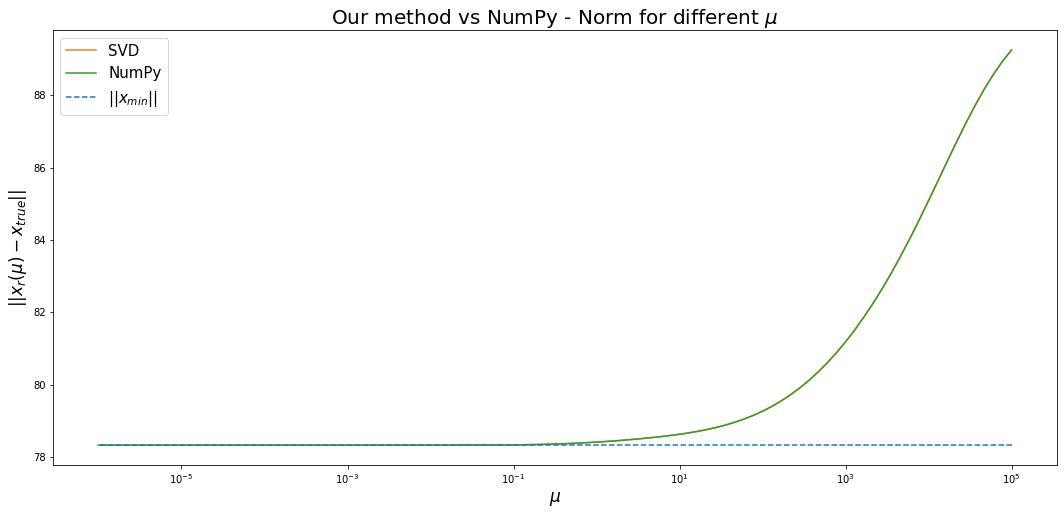

In [42]:
plt.figure(figsize=(18,8))
plt.plot(musSVD, normsSVD, color = "C1")
plt.plot(musNP, normsNP, color = "C2")
plt.hlines(y = x_min, xmin = musSVD[0], xmax = musSVD[-1], linestyles='dashed')

plt.title("Our method vs NumPy - Norm for different $\mu$", fontsize = 20)
plt.xlabel("$\mu$", fontsize = 17)
plt.ylabel("$\|| x_{r}(\mu) - x_{true} \||$", fontsize = 17)
plt.legend(["SVD", "NumPy", "$||x_{min}||$"], fontsize = 15)
plt.xscale("log")

The first thing you may ask yourself when looking at the plot is "where is the SVD-line?". This question is a testament to the accuracy of the methods, any differences are negligible, the plots perfectly align. The next noticeable thing is the clear correlation between $\mu$ and the norm. The lower the value of $\mu$, the more accurate the reconstruction of $\boldsymbol{x}_{true}$ becomes. This makes a lot of sense when looking at ([13](#mjx-eqn-eq13)) and ([14](#mjx-eqn-eq14)). For a small $\mu$ the term $\| A\boldsymbol{x} - \boldsymbol{y} \|_2^2$ dominates and a solution will mainly "focus" on being close to $\boldsymbol{x}_{true}$. With a big $\mu$ a solution will mainly "focus" on making $\| \boldsymbol{x} \|_2^2$ small while being an actual solution becomes less important. What $\mu$ to use really depends on the problem at hand, what is important. However, the norm starts growing much faster when $\mu$ approaches $1$, so choosing $\mu$ any larger than this seems unnecessary.

## Task 3: Single channel source separation

Now we want to apply some of our learned knowledge to a real life problem. In this task we are working with images where $0$ and $1$'s are mixed together. Our goal is to separate these mixed images into separate images. The theoretical background is a little lengthy and described in detail in the project description but here is a short summary.

We assume the two separate signals ($0$ and $1$) can be described by two linear subspaces. $W_0$ is a matrix where the columns are basisvectors for the $0$-subspace and we have the same for $1$ in $W_1$ (these bases are generally difficult to find, so in this project they are given). Given a mixed signal $\boldsymbol{y}$ we want to project it down to the two different subspaces. The distance between $\boldsymbol{y}$ and its projection onto a subspace $Z = Col(W)$ is given by

$$
\| B\boldsymbol{y} \| = \boldsymbol{y}^TB^TB\boldsymbol{y} \text{,} \hspace{0.3cm} B = I - WW^T
$$

In terms of minimal norm this problem then turns into solving

$$
\boldsymbol{x} = \underset{\boldsymbol{x}\in\mathbb{R}^n}{\arg\min} \frac{1}{2}\boldsymbol{x}^TB\boldsymbol{x}, \text{  such that  } A\boldsymbol{x} = \boldsymbol{y} \label{eq18}\tag{18}
$$

with

$$
B =
\begin{bmatrix}
B_0 & 0 \\ 0 & B_1
\end{bmatrix}, \hspace{0.2cm}
A =
\begin{bmatrix}
I & I
\end{bmatrix}, \hspace{0.2cm}
\boldsymbol{x} = \begin{bmatrix} \boldsymbol{u} \\ \boldsymbol{v} \end{bmatrix}, \hspace{0.2cm}
\boldsymbol{y} = \boldsymbol{u} + \boldsymbol{v}
$$

where $\boldsymbol{u}$ and $\boldsymbol{v}$ are the separate signals we are interested in.

### a) The B-matrix

As for the previous tasks, we are interested in the properties of the matrices we are working with. We know that $B$ is a projection matrix if $B = B^2$. This is clearly the case in our situation since

$$
B = I - WW^T \implies B^2 = (I-WW^T)(I-WW^T)=I-WW^T-WW^T+WW^TWW^T = I-WW^T = B
$$

For the penultimate equality we have used the fact that $W$ is pairwise orthogonal so that $W^TW=I$. Also, $B$ is positive semi-definite. This is easily shown when looking at the eigenvalues.

$$
\begin{align*}
B\boldsymbol{v}&=\lambda\boldsymbol{v} \\
B^2\boldsymbol{v}&=\lambda\boldsymbol{v} \\
BB\boldsymbol{v}&=\lambda\boldsymbol{v} \\
\lambda B\boldsymbol{v}&=\lambda\boldsymbol{v} \\
\lambda^2 \boldsymbol{v}&=\lambda\boldsymbol{v} \\
\boldsymbol{v}(\lambda^2 - \lambda)&=\boldsymbol{0}
\end{align*}
$$

So for $\boldsymbol{v} \neq \boldsymbol{0}$ we get $\lambda_1$ = $0$ and $\lambda_2$ = $1$. Since $\lambda_1 \geq 0$ and $\lambda_2 \geq 0$ $B$ is positive semi-definite.

### b) Minimal norm
#### 1) Lagrange function

Just as in task $1$ for minimal norm, we introduce the lagrange function. In terms of ([18](#mjx-eqn-eq18)), the lagrange function takes the form

$$
\mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda}) = \frac{1}{2}\boldsymbol{x}^TB\boldsymbol{x} +
\boldsymbol{\lambda}^T(A\boldsymbol{x}-\boldsymbol{y})
$$

As before, we know a solution satisfies $\nabla_x T(\boldsymbol{x}) = 0$ and $\nabla_\lambda T(\boldsymbol{x}) = 0$. Taking the gradient w.r.t. $x$ we get

$$
\nabla_x T(\boldsymbol{x}) = \frac{1}{2} \nabla_x(\boldsymbol{x}^TB\boldsymbol{x}) + \nabla_x(\boldsymbol{\lambda}^TA\boldsymbol{x}) - \nabla_x(\boldsymbol{\lambda}^T \boldsymbol{y})
$$

The last term is obviously zero, while the first two terms were calculated in exercise 2 and the results will be used here without proof. The resulting gradient is

$$
\nabla_x T(\boldsymbol{x}) = \frac{1}{2} (B + B^T)\boldsymbol{x} + A^T\boldsymbol{\lambda} \label{eq19}\tag{19}
$$

For $\lambda$ we get

$$
\nabla_\lambda T(\boldsymbol{x}) = \frac{1}{2} \nabla_\lambda(\boldsymbol{x}^TB\boldsymbol{x}) + \nabla_\lambda(\boldsymbol{\lambda}^TA\boldsymbol{x}) - \nabla_\lambda(\boldsymbol{\lambda}^T \boldsymbol{y})
$$

The first term is clearly zero, and we remember for task $2c)$ that the last two terms result in

$$
\nabla_\lambda T(\boldsymbol{x}) = A\boldsymbol{x}-\boldsymbol{y} \label{eq20}\tag{20}
$$

Setting $(\ref{eq19})$ and $(\ref{eq20})$ to zero we get a set of equations

$$
\begin{align*}
\frac{1}{2} (B + B^T)\boldsymbol{x} + A^T\boldsymbol{\lambda} &= 0 \\
A\boldsymbol{x}&=\boldsymbol{y}
\end{align*}
$$

We can gather these equations in a matrix equation. The resulting equation is

$$
\begin{bmatrix}
\frac{1}{2}(B+B^T) & A^T \\ A & 0
\end{bmatrix}
\begin{bmatrix}
\boldsymbol{x} \\ \boldsymbol{\lambda}
\end{bmatrix}
=
\begin{bmatrix}
0 \\ \boldsymbol{y}
\end{bmatrix} \label{eq21}\tag{21}
$$

Inserting for $B$, $A$ and $x$ we can rewrite $(\ref{eq21})$.

$$
\begin{align*}
\begin{bmatrix} B & A^T \\ A & 0 \end{bmatrix}
\begin{bmatrix} \boldsymbol{u} \\ \boldsymbol{v} \\ \boldsymbol{\lambda} \end{bmatrix}
&=
\begin{bmatrix} 0 \\ 0 \\ \boldsymbol{y} \end{bmatrix}
\\
\begin{bmatrix} B_0 & 0 & I \\ 0 & B_1 & I \\ I & I & 0 \end{bmatrix}
\begin{bmatrix} \boldsymbol{u} \\ \boldsymbol{v} \\ \boldsymbol{\lambda} \end{bmatrix}
&=
\begin{bmatrix} 0 \\ 0 \\ \boldsymbol{y} \end{bmatrix}
\\
\begin{bmatrix} I - W_0W_0^T & 0 & I \\ 0 & I - W_1W_1^T & I \\ I & I & 0 \end{bmatrix}
\begin{bmatrix} \boldsymbol{u} \\ \boldsymbol{v} \\ \boldsymbol{\lambda} \end{bmatrix}
&=
\begin{bmatrix} 0 \\ 0 \\ \boldsymbol{y} \end{bmatrix} \label{eq22}\tag{22}
\end{align*}
$$

#### 2) Deriving solution
We can easily eliminate $\boldsymbol{\lambda}$ from ([22](#mjx-eqn-eq22)). First we write out the equations.

$$
\begin{align*}
(I - W_0W_0^T)\boldsymbol{u} + I\boldsymbol{\lambda} = \boldsymbol{0} \label{I}\tag{I} \\
(I - W_1W_1^T)\boldsymbol{v} + I\boldsymbol{\lambda} = \boldsymbol{0} \label{II}\tag{II} \\
I(\boldsymbol{u}+\boldsymbol{v}) = \boldsymbol{y} \label{III}\tag{III}
\end{align*}
$$

Taking $(\ref{II})$ - $(\ref{I})$ we get

$$
\begin{align*}
(I - W_0W_0^T)\boldsymbol{u} - (I - W_1W_1^T)\boldsymbol{v} = \boldsymbol{0} \label{II - I}\tag{II - I}
\end{align*}
$$

Solving $(\ref{III})$ for $\boldsymbol{v}$ we get

$$
\boldsymbol{v} = \boldsymbol{y} - \boldsymbol{u} \label{eq23}\tag{23}
$$

Inserting this into $(\ref{II - I})$ results in

$$
\begin{align*}
(I - W_0W_0^T)\boldsymbol{u} + (I - W_1W_1^T)(\boldsymbol{u} - \boldsymbol{y}) &= \boldsymbol{0} \\
2I\boldsymbol{u} - W_0W_0^T\boldsymbol{u} - W_1W_1^T\boldsymbol{u} - \boldsymbol{y} + W_1W_1^T\boldsymbol{y} &= \boldsymbol{0} \\
(2I - W_0W_0^T - W_1W_1^T)\boldsymbol{u} &= (I - W_1W_1^T)\boldsymbol{y} \\
C\boldsymbol{u} &= \boldsymbol{d} \label{eq24}\tag{24}
\end{align*}
$$

In the last equality we have introduced $C = 2I - W_0W_0^T - W_1W_1^T$ and $d = (I - W_1W_1^T)\boldsymbol{y}$.

#### 3) Implementing solver

We are now able to implement a solver to find $\boldsymbol{u}$ and $\boldsymbol{v}$. First by solving ([24](#mjx-eqn-eq24)) for $\boldsymbol{u}$, then using this result in ([23](#mjx-eqn-eq23)) to find $\boldsymbol{v}$. There are many different ways to approach this, but let us try to reuse the minimal norm solver we have already implemented earlier. This time however let us use NumPy's $QR$-decomposition and compare it to its own solver. We have already discussed the benefits of these different methods. The $QR$-method uses substantially longer on its precalculations, however it is way faster than NumPy's solver after that. Now it remains to see with this coefficient matrix, and with our $100$ different images, whether or not the $QR$ is faster in total.

In [44]:
from random import randint

def solveQR(W0, W1, Y, onlyPreCalc = False):
    """"
    Separates mixed images of zeros and ones into two separate images using QR-decomposition
    m: pixels in image
    N: nr. of images
    n: nr of basis vectors
    input:
        W0: (mxn), basis for zeros
        W1: (mxn), basis for ones
        Y: (mxN), mixed signals
    return:
        U: (mxN), matrix where each column is a zero image
        V: (mxN), matrix where each column is a one image
    """
    m = W0.shape[0]
    N = int(Y.shape[1]/2)
    U = np.zeros((m, N))
    V = np.zeros((m, N))
    C = 2*np.identity(m) - W0@W0.T - W1@W1.T
    Q, R = np.linalg.qr(C)
    d_base = np.identity(m) - W1@W1.T
    
    if onlyPreCalc:
        return
    
    for i in range(N):
        d = d_base@Y[:,i]
        u = solve_xmin_QR(Q, R, d)
        v = Y[:,i] - u
        U[:,i] = u
        V[:,i] = v  
    return U, V

def solveReg(W0, W1, Y, onlyPreCalc = False):
    """"
    Separates mixed images of zeros and ones into two separate images using np.linalg.solve()
    m: pixels in image
    N: nr. of images
    n: nr of basis vectors
    input:
        W0: (mxn), basis for zeros
        W1: (mxn), basis for ones
        Y: (mxN), mixed signals
    return:
        U: (mxN), matrix where each column is a zero image
        V: (mxN), matrix where each column is a one image
    """
    m = W0.shape[0]
    N = int(Y.shape[1]/2)
    U = np.zeros((m, N))
    V = np.zeros((m, N))
    C = 2*np.identity(m) - W0@W0.T - W1@W1.T
    d_base = np.identity(m) - W1@W1.T
    
    if onlyPreCalc:
        return
    
    for i in range(N):
        d = d_base@Y[:,i]
        u = np.linalg.solve(C, d)
        v = Y[:,i] - u
        U[:,i] = u
        V[:,i] = v  
    return U, V

### d) Numerical results
We start by loading the given data. The mixed images are $28\times 28$ pixels and stored in a $28^2 \times 100$ where the $100$ columns are for the $N = 100$ different images.

In [43]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
Y = np.load('Data/mixed.npy')

Lets time our methods' precalculations

In [22]:
%%timeit
solveQR(W0, W1, Y, onlyPreCalc = True)

149 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
solveReg(W0, W1, Y, onlyPreCalc = True)

21.6 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


And now lets time the whole process

In [24]:
%%timeit
solveQR(W0, W1, Y)

209 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
solveReg(W0, W1, Y)

1.03 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Clearly, now with an optimized $QR$-decomposition, this method already at $N=100$ problems outcompetes the standard method, and by quite some margin. It is actually almost $5$ times faster this time. So our previous discussion on efficiency when solving for many different $\boldsymbol{y}$s does really have something to it!

Finally let us have a look at the results of the separations

In [45]:
U, V = solveQR(W0, W1, Y)

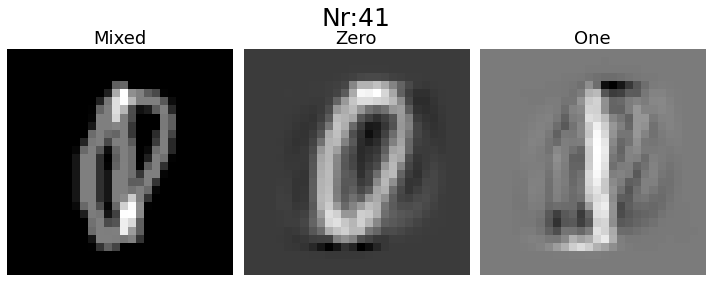

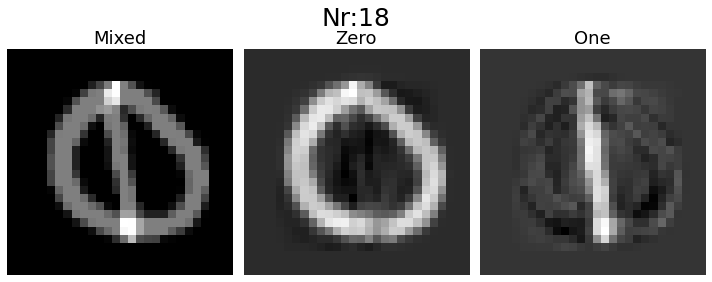

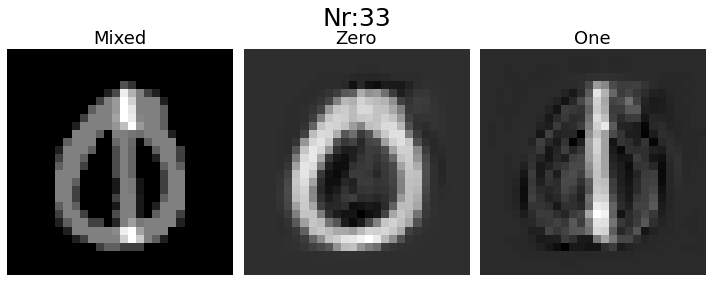

In [59]:
def plotImgs(data, m, n, title, size=4):
    """
    Plots (mxn) grid of images
    """
    data_max = int(data[0].shape[1]/2)
    indices = np.zeros(m)
    for i in range(m):
        num = randint(0, data_max)
        while num in indices:
            num = randint(0, data_max)
        indices[i] = num
    
    for j in range(m):
        print("\n\n")
        fig, axes = plt.subplots(1,n, figsize=(2.5*size, size))
        fig.suptitle("Nr:" + str(int(indices[j])), fontsize = 25)
        for i in range(n):
            axes[i].imshow(data[i][:,int(indices[j])].reshape((28,28)), cmap="gray")
            axes[i].set_title(title[i], fontsize = 18)
            axes[i].axis('off')
        plt.tight_layout()
        plt.show()
        
plotImgs([Y, U, V],3,3, title = ["Mixed", "Zero", "One"])

Looking at the images, it is clear that we have indeed (at least to a certain degree) managed to separate the mixed image. Granted, there is quite a bit of noise in both the zero- and one-image, however two the human eye there is a clear separation. Especially in the cases where the one is a straight line with the same thickness the whole way and not so "smudged out" the results are good. The same goes for the zero. The most noticeable "error" is the clear ring around the ones. By setting a threshold for the accepted value it it possible to retrieve a more "clear" image. This does however manipulate the result so it might not be of much use in the real world, but it is a cool observation. Below, an example is shown.

(-0.5, 27.5, 27.5, -0.5)

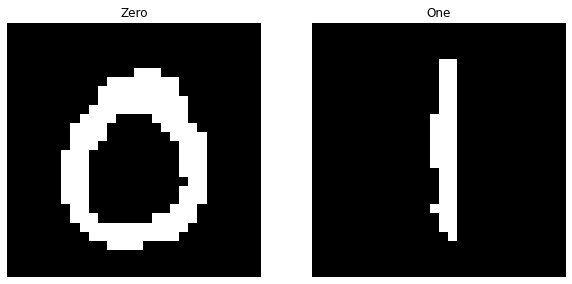

In [60]:
a = U[:,33].copy()
a[a < 0.5] = 0
a[a >= 0.5] = 1

b = V[:,33].copy()
b[b < 0.5] = 0
b[b >= 0.5] = 1

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(a.reshape((28,28)), cmap="gray")
axs[0].set_title("Zero")
axs[0].axis("off")

axs[1].imshow(b.reshape((28,28)), cmap="gray")
axs[1].set_title("One")
axs[1].axis("off")

The biggest drawback of this approach however has to be the fact that the bases $W_0$ and $W_1$ are difficult to find. If machine learning is necessary to find these, it seems more efficient to implement some machine learning algorithm to also do the work we have done here, with way greater accuracy.

## Summary

In this project we have studied multiple ways to approach an ill-posed problem. We have made optimization problems by introducing extra criteria, minimal norm and also Tikhonov regularization. We then implemented code to test these methods on different problems and compare their accuracy and efficiency against NumPy's methods. The observations were that the methods were just as accurate. Also when using the same coefficient matrix for multiple problems, it is very beneficial to decompose the matrix in some way. For all the cases, at some point it becomes faster to decompose first, rather than solving for each problem.

Lastly we used our discussions at a practical problem, single channel source separation. We "projected" mixed images onto subspaces with handed out basis vectors. We used $QR$-decomposition to solve this problem, and the results were quite impressive, though not without drawbacks.